In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt


train_file_name = "train.csv"
train_data = pd.read_csv(train_file_name)
test_file_name = "test.csv"
test_data = pd.read_csv(test_file_name)

In [ ]:
def plot_distribution():
    

In [43]:
pd.DataFrame((train_data.median(), train_data.mean()))

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,6.020794e+06,5000.000000,0.000000,30834.50000,2.000000,0.000000,15000.000000,83.500000,0.000000,5000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,35000.000000,46.000000,0.000000,0.000000
1,6.060602e+06,44247.935383,1.284262,165357.35802,3.760642,4070.925131,128421.216776,2615.988925,10672.104919,84146.830185,...,1107.137568,3.474087,4878.172179,0.118576,1.080637,3.43325,39363.189998,47.632203,0.270051,0.314458


In [5]:
train_data.columns

Index(['order_id', 'cred_sum_cc_all', 'mfo_inqs_count_month',
       'all_closed_creds_sum_all', 'bank_inqs_count_quarter',
       'cred_max_overdue_max_ly', 'all_active_creds_sum_all',
       'mfo_last_days_all', 'cred_sum_cc_ly', 'cred_sum_debt_all_all',
       'all_closed_creds_sum_ly', 'mfo_cred_mean_sum_3lm',
       'delay_more_sum_all', 'all_creds_count_all',
       'cred_day_overdue_all_sum_all', 'cred_max_overdue_max_3lm',
       'mfo_closed_count_ly', 'cred_sum_overdue_cc_all',
       'count_overdue_all_3lm', 'all_creds_count_lm', 'work_code',
       'month_income', 'region', 'bad', 'approved'],
      dtype='object')

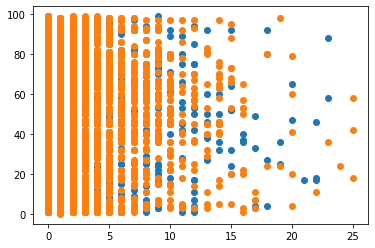

In [19]:
tmp = train_data.dropna()
plt.scatter(tmp.mfo_inqs_count_month[tmp.bad == 1], tmp.region[tmp.bad == 1])
plt.scatter(tmp.mfo_inqs_count_month[tmp.bad == 0], tmp.region[tmp.bad == 0])

In [2]:
# Model 1
train_data_1_model = train_data.dropna()
y = train_data_1_model["bad"]
X = train_data_1_model.drop(["bad", "approved"], axis=1)
model_1 = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty="elasticnet", solver="saga", l1_ratio=0, class_weight="balanced", max_iter=1000))
model_1.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', l1_ratio=0,
                                    max_iter=1000, penalty='elasticnet',
                                    random_state=1, solver='saga'))])

In [3]:
# Model 2
train_data_2_model = train_data
y = train_data_2_model["approved"]
X = train_data_2_model.drop(["bad", "approved"], axis=1)
model_2 = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, penalty="elasticnet", solver="saga", l1_ratio=0, class_weight="balanced", max_iter=1000))
model_2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', l1_ratio=0,
                                    max_iter=1000, penalty='elasticnet',
                                    random_state=1, solver='saga'))])

# Test

In [4]:
# 1
test_1_2 = test_data.copy(deep=True)
test_1_2["bad_prob"] = model_1.predict_proba(test_1_2.drop(["bad", "approved"], axis=1))[:, 1]

test_1_3 = test_1_2.dropna()
coef = test_1_3.bad_prob.max() - test_1_3.bad_prob.min()
bias = test_1_3.bad_prob.min()
test_1_3.sort_values("bad_prob", ascending=False)
intervals = 7
test_1_3 = [test_1_3.query(f"{(i/7*coef + bias if i > 0 else 0)} < bad_prob <= {((i+1)/7*coef + bias if i != intervals-1 else 1)}") for i in range(intervals)]

In [5]:
test_data

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5499904,16000.00,0,6890,1,33722.12,33722,9999,0.0,0.00,...,0.00,0,0.00,0,0,5,35000,65,NaN,0
1,5501986,0.00,0,0,5,5000.00,0,289,0.0,0.00,...,0.00,0,0.00,0,0,3,35000,7,NaN,0
2,5503586,133000.00,1,284685,9,16600.00,716305,6,50000.0,593315.33,...,16600.00,4,2409.33,1,4,4,50000,18,1.0,1
3,5507043,10000.00,0,0,0,0.00,0,9999,0.0,0.00,...,0.00,0,9968.84,0,0,5,20000,58,NaN,0
4,5512692,120500.00,0,1293089,8,9605.18,1562678,33,0.0,1392907.34,...,1221.81,1,4442.42,1,0,3,50000,20,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,6696080,87194.17,0,170290,4,0.00,22500,651,0.0,0.00,...,0.00,0,9766.60,0,0,2,35000,42,NaN,0
1214,6696174,0.00,2,1000,0,0.00,2000,802,0.0,0.00,...,0.00,0,0.00,0,0,5,35000,73,NaN,0
1215,6696256,18690.24,4,313674,10,0.00,79489,3,0.0,43872.29,...,0.00,23,0.00,0,8,5,50000,75,0.0,1
1216,6697042,97000.00,0,217499,2,0.00,39410,508,0.0,27918.46,...,0.00,0,0.00,0,0,4,50000,75,NaN,0


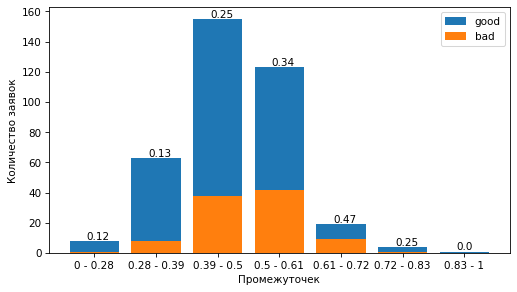

In [6]:
labels = [f"{round(i/7*coef + bias if i > 0 else 0, 2)} - {round((i+1)/7*coef + bias if i != intervals-1 else 1, 2)}" for i in range(intervals)]
badrate = [len(i.query("bad == 1"))/len(i) if not i.empty else 0 for i in test_1_3]
bad = [len(i.query("bad == 1")) for i in test_1_3]
all_ = [len(i) for i in test_1_3]
# draw figure
fig, ax = plt.subplots(figsize=(7,4), dpi= 75,)
ax.bar(labels, all_, label="good")
ax.bar(labels, bad, label="bad")
for i in range(len(badrate)):
    ax.text( i-0.125, all_[i]+1, round(badrate[i], 2))
ax.legend()
ax.set_ylabel('Количество заявок')
ax.set_xlabel('Промежуточек')
plt.tight_layout()
plt.show()

In [7]:
import numpy as np
test_2_1 = test_1_2.loc[test_1_2.bad.isna(), :]
test_2_1.loc[:, "bad"] = 0
test_2_1_index_list = [test_2_1.query(f"{(i/7*coef + bias if i > 0 else 0)} < bad_prob <= {((i+1)/7*coef + bias if i != intervals-1 else 1)}").index for i in range(intervals)]

for indx, bad in zip(test_2_1_index_list, badrate):
    for _ in range(int(len(indx) * bad)):
        randint = np.random.randint(0, len(indx))
        while test_2_1.at[indx[randint], "bad"] == 1 and not (test_2_1.loc[indx, "bad"] == 1).all():
            randint = np.random.randint(0, len(indx))
        test_2_1.at[indx[randint], "bad"] = 1

/home/nikittossii/Documents/test_tasks/Devim/env/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [8]:
test_1_2.loc[test_2_1.index, :] = test_2_1 
test_3 = test_1_2

In [9]:
# task 4
test_4 = test_3.sort_values(by="bad_prob")[: int(0.3 * len(test_3))]
test_4.sort_values(by="bad_prob")
BadRate = lambda bad : len(bad.query("bad == 1"))/len(bad) if not bad.empty else None
BadRate(test_4)

0.1917808219178082

In [10]:
test_5 = test_3.copy(deep=True)
test_5["app_prob"] = model_2.predict_proba(test_3.drop(["bad", "approved", "bad_prob"], axis=1))[:, 0]
test_6 = test_5.sort_values(by="app_prob")[: int(0.30 * len(test_5))]
print(BadRate(test_6))
test_6.sort_values("app_prob").tail(5)

0.2356164383561644


,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved,bad_prob,app_prob
451,5922034,133642.5,2,271289,1,8000.00,370500,2,16142.5,40269.48,...,16142.5,1,4,4,50000,7,0.0,0,0.580516,0.470136
548,6202968,16000.0,2,54463,2,7778.14,158098,4,0.0,134568.58,...,0.0,0,2,5,50000,46,0.0,1,0.540252,0.472816
568,6287352,0.0,3,1000,0,0.00,4500,1,0.0,4500.00,...,0.0,0,3,2,35000,76,0.0,0,0.476355,0.475116
371,5829525,0.0,0,27600,0,4000.00,10000,20,0.0,9404.70,...,0.0,0,1,5,60000,58,1.0,0,0.507844,0.475353
801,6548738,0.0,0,0,12,0.00,1000,504,0.0,0.00,...,0.0,0,0,4,35000,45,0.0,0,0.489655,0.475485


In [11]:
# combination of model_1 and model_2
def fit_model(data):
    data["bad_prob"] = model_1.predict_proba(data.drop(["bad", "approved"], axis=1))[:, 1]
    return make_pipeline(StandardScaler(), LogisticRegression(random_state=1, class_weight={1:1, 0:0}, max_iter=10000)).fit(data.drop(["bad", "approved"], axis=1), data["approved"])

def predict(data, model):
    data["bad_prob"] = model_1.predict_proba(data.drop(["bad", "approved"], axis=1))[:, 1]
    return model.predict_proba(data.drop(["bad", "approved"], axis=1))

model_3 = fit_model(train_data.copy(deep=True))

test_7 = test_5.copy(deep=True)
test_7["app_prob"] = predict(test_data.copy(deep=True), model_3)[:, 0]
print(BadRate(test_7.sort_values(by="app_prob")[: int(0.30 * len(test_7))]))

0.24383561643835616


In [12]:
# Sampling a sample by subdiscritization for model 1
x_train = train_data.dropna()
amount = len(x_train.query("bad == 1"))
amount -= len(x_train.query("bad == 0"))
amount *= -1
while amount != 0:
    rand_indx = np.unique(np.random.randint(0,len(x_train.query("bad == 0")), amount))
    amount -= len(rand_indx)
    x_train = x_train.drop(x_train.query("bad == 0").index[rand_indx])
x_train.bad.mean()
model_4 = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, class_weight="balanced")).fit(x_train.drop(["bad", 'approved'], axis=1), x_train["bad"])
test_8 = test_5.copy(deep=True)
test_8["app_prob"] = model_4.predict_proba(test_8.drop(["bad", "approved", "bad_prob", "app_prob"], axis=1))
print(BadRate(test_8.sort_values(by="bad_prob")[: int(0.30 * len(test_8))]))

0.1917808219178082


In [13]:
# Sampling a sample by subdiscritization for model 2
x_train = train_data.copy(deep=True)
amount = len(x_train.query("approved == 1"))
amount -= len(x_train.query("approved == 0"))
amount *= -1
while amount != 0:
    rand_indx = np.unique(np.random.randint(0,len(x_train.query("approved == 0")), amount))
    amount -= len(rand_indx)
    x_train = x_train.drop(x_train.query("approved == 0").index[rand_indx])
x_train.approved.mean()
model_5 = make_pipeline(StandardScaler(), LogisticRegression(random_state=1, class_weight="balanced")).fit(x_train.drop(["bad", 'approved'], axis=1), x_train["approved"])
test_9 = test_5.copy(deep=True)
test_9["app_prob"] = model_5.predict_proba(test_8.drop(["bad", "approved", "bad_prob", "app_prob"], axis=1))
print(BadRate(test_9.sort_values(by="app_prob")[: int(0.30 * len(test_9))]))

0.2273972602739726
